In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Загрузка данных

In [102]:
path = 'weather.csv'
df_weather = pd.read_csv(path, sep=',', decimal='.', encoding='utf-8', skiprows=[1])


# Обработка заголовков

In [103]:
df_weather.columns = df_weather.columns.str.lower().str.replace(' ', '_')


# Удаление дубликатов

In [104]:
df_weather.drop_duplicates(inplace=True)


# Конвертация времени

In [105]:
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])


## 1. Исследование типов данных и структуры

In [106]:
print("1. Основная информация о датасете:")
df_weather.info()
print(f"\nРазмер датасета: {df_weather.shape}")


1. Основная информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             3672 non-null   datetime64[ns]
 1   temperature          3617 non-null   float64       
 2   precipitation_total  3642 non-null   float64       
 3   wind_gust            3672 non-null   float64       
 4   wind_speed           3656 non-null   float64       
 5   cloud_cover_total    3652 non-null   float64       
 6   sunshine_duration    3660 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 200.9 KB

Размер датасета: (3672, 7)


## 2. Поиск и анализ дубликатов

In [107]:
duplicates_count = df_weather.duplicated().sum()
print(f"2. Количество явных дубликатов: {duplicates_count}")


2. Количество явных дубликатов: 0


## 3. Поиск аномалий в данных

In [108]:
print("3. Проверка аномальных значений:")

cloud_anomalies = df_weather[(df_weather['cloud_cover_total'] < 0) | (df_weather['cloud_cover_total'] > 100)]
print(f"  Аномальные значения облачности: {len(cloud_anomalies)} записей")



3. Проверка аномальных значений:
  Аномальные значения облачности: 0 записей


## 4. Поиск выбросов

In [109]:
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound


print("4. Выбросы в числовых столбцах:")
numeric_cols = df_weather.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    outliers, lower, upper = find_outliers_iqr(df_weather[col])
    if len(outliers) > 0:
        print(f"  {col}: {len(outliers)} выбросов")


4. Выбросы в числовых столбцах:
  temperature: 2 выбросов
  precipitation_total: 676 выбросов
  wind_gust: 113 выбросов
  wind_speed: 111 выбросов


## 5. Графический анализ выбросов

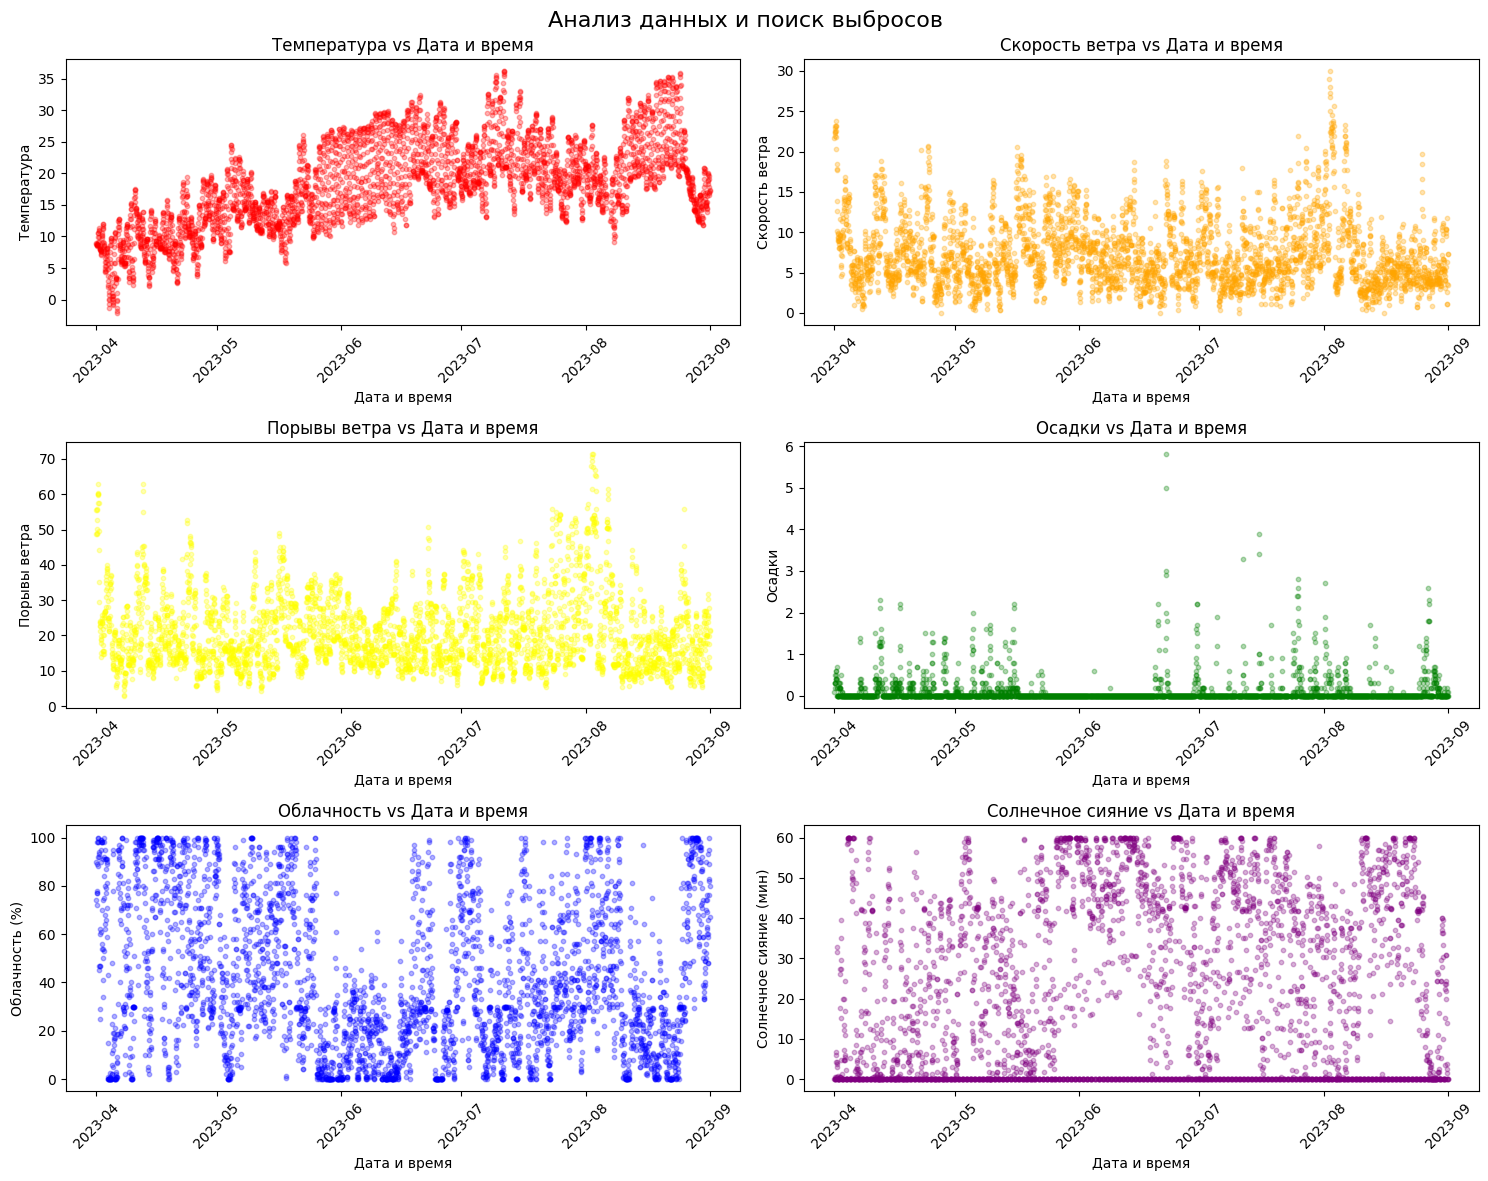

In [110]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Анализ данных и поиск выбросов', fontsize=16)

# Температура
axes[0, 0].scatter(df_weather['datetime'], df_weather['temperature'], alpha=0.3, s=10, color='red')
axes[0, 0].set_xlabel('Дата и время')
axes[0, 0].set_ylabel('Температура')
axes[0, 0].set_title('Температура vs Дата и время')
axes[0, 0].tick_params(axis='x', rotation=45)

# Скорость ветра
axes[0, 1].scatter(df_weather['datetime'], df_weather['wind_speed'], alpha=0.3, s=10, color='orange')
axes[0, 1].set_xlabel('Дата и время')
axes[0, 1].set_ylabel('Скорость ветра')
axes[0, 1].set_title('Скорость ветра vs Дата и время')
axes[0, 1].tick_params(axis='x', rotation=45)

# Порывы ветра
axes[1, 0].scatter(df_weather['datetime'], df_weather['wind_gust'], alpha=0.3, s=10, color='yellow')
axes[1, 0].set_xlabel('Дата и время')
axes[1, 0].set_ylabel('Порывы ветра')
axes[1, 0].set_title('Порывы ветра vs Дата и время')
axes[1, 0].tick_params(axis='x', rotation=45)

# Осадки
axes[1, 1].scatter(df_weather['datetime'], df_weather['precipitation_total'], alpha=0.3, s=10, color='green')
axes[1, 1].set_xlabel('Дата и время')
axes[1, 1].set_ylabel('Осадки')
axes[1, 1].set_title('Осадки vs Дата и время')
axes[1, 1].tick_params(axis='x', rotation=45)

# Облачность
axes[2, 0].scatter(df_weather['datetime'], df_weather['cloud_cover_total'], alpha=0.3, s=10, color='blue')
axes[2, 0].set_xlabel('Дата и время')
axes[2, 0].set_ylabel('Облачность (%)')
axes[2, 0].set_title('Облачность vs Дата и время')
axes[2, 0].tick_params(axis='x', rotation=45)

# Солнечное сияние
axes[2, 1].scatter(df_weather['datetime'], df_weather['sunshine_duration'], alpha=0.3, s=10, color='purple')
axes[2, 1].set_xlabel('Дата и время')
axes[2, 1].set_ylabel('Солнечное сияние (мин)')
axes[2, 1].set_title('Солнечное сияние vs Дата и время')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 6. Анализ пропущенных значений

In [111]:
print("5. Анализ пропущенных значений:")
missing_data = df_weather.isnull().sum()
missing_percent = (missing_data / len(df_weather)) * 100

missing_info = pd.DataFrame({
    'Пропущено': missing_data,
    'Процент': missing_percent
})
print(missing_info[missing_info['Пропущено'] > 0])


5. Анализ пропущенных значений:
                     Пропущено   Процент
temperature                 55  1.497821
precipitation_total         30  0.816993
wind_speed                  16  0.435730
cloud_cover_total           20  0.544662
sunshine_duration           12  0.326797


## 6.1 Обработка пропусков

In [112]:
df_weather_processed = df_weather.copy()

for col in df_weather.columns:
    if df_weather[col].isnull().sum() > 0:
        null_count = df_weather[col].isnull().sum()
        null_percent = (null_count / len(df_weather)) * 100

        if null_percent < 5:
            df_weather_processed = df_weather_processed.dropna(subset=[col])
        elif null_percent < 30:
            if col in ['temperature', 'wind_speed', 'wind_gust']:
                df_weather_processed[col] = df_weather_processed[col].interpolate(method='time')
            elif col == 'precipitation_total':
                df_weather_processed[col] = df_weather_processed[col].fillna(0)
            elif col == 'cloud_cover_total':
                median_val = df_weather_processed[col].median()
                df_weather_processed[col] = df_weather_processed[col].fillna(median_val)

print(f"Размер данных после обработки пропусков: {df_weather_processed.shape}")


Размер данных после обработки пропусков: (3540, 7)


## 7. Итоговый анализ

6. Итоговый анализ данных:

Основные статистики после обработки:


,datetime,temperature,precipitation_total,wind_gust,wind_speed,cloud_cover_total,sunshine_duration
count,3540,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000
mean,2023-06-16 01:20:37.627118592,18.060997,0.100904,20.737423,7.288192,40.809237,21.611554
min,2023-04-01 00:00:00,-2.079755,0.000000,2.880000,0.000000,0.000000,0.000000
25%,2023-05-08 06:45:00,13.202745,0.000000,12.959999,4.334974,15.000000,0.000000
50%,2023-06-15 15:30:00,18.015245,0.000000,18.359999,6.287130,32.000000,15.379544
75%,2023-07-24 20:15:00,22.835246,0.000000,26.280000,9.387650,67.000000,42.424244
max,2023-08-31 23:00:00,36.150246,5.800000,71.280000,29.966620,100.000000,60.000000
std,NaN,6.842901,0.346874,10.279049,4.202952,31.309308,21.882652



Корреляционная матрица:


,temperature,precipitation_total,wind_gust,wind_speed,cloud_cover_total,sunshine_duration
temperature,1.000000,-0.025172,0.181634,0.042023,-0.304307,0.529380
precipitation_total,-0.025172,1.000000,0.236217,0.141315,0.249688,-0.079954
wind_gust,0.181634,0.236217,1.000000,0.849777,0.222272,0.191787
wind_speed,0.042023,0.141315,0.849777,1.000000,0.189839,0.067632
cloud_cover_total,-0.304307,0.249688,0.222272,0.189839,1.000000,-0.510808
sunshine_duration,0.529380,-0.079954,0.191787,0.067632,-0.510808,1.000000


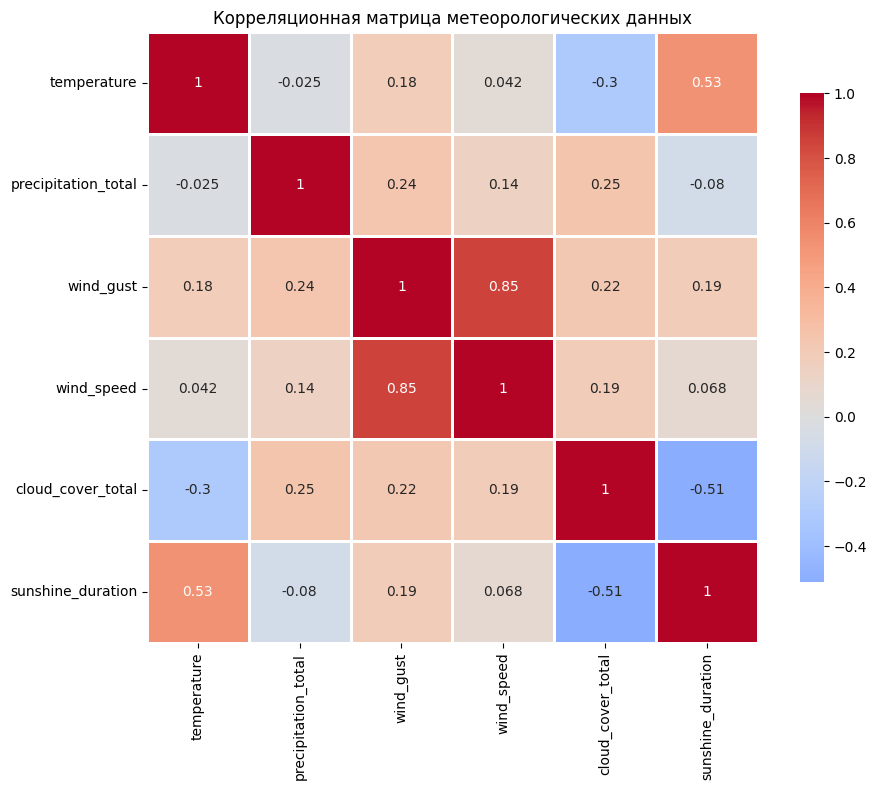

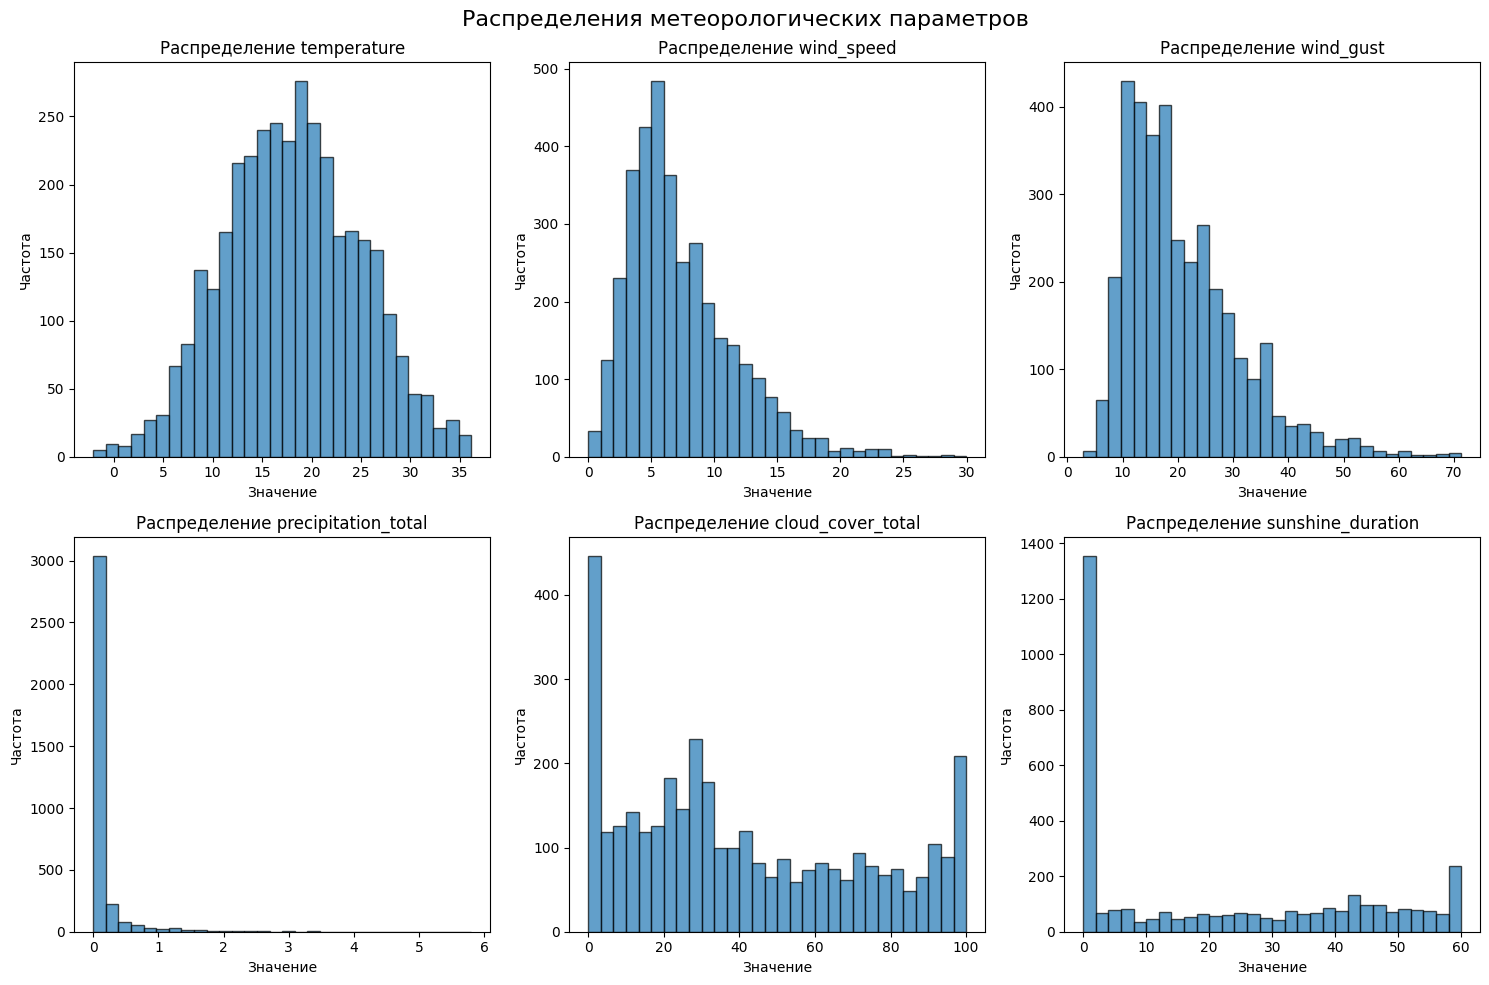

In [113]:
print("6. Итоговый анализ данных:")

print("\nОсновные статистики после обработки:")
display(df_weather_processed.describe())

# Корреляционный анализ
print("\nКорреляционная матрица:")
correlation_matrix = df_weather_processed.select_dtypes(include=[np.number]).corr()
display(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица метеорологических данных')
plt.tight_layout()
plt.show()

numeric_vars = ['temperature', 'wind_speed', 'wind_gust', 'precipitation_total', 'cloud_cover_total',
                'sunshine_duration']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Распределения метеорологических параметров', fontsize=16)

for i, var in enumerate(numeric_vars):
    row, col = i // 3, i % 3
    axes[row, col].hist(df_weather_processed[var].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'Распределение {var}')
    axes[row, col].set_xlabel('Значение')
    axes[row, col].set_ylabel('Частота')

plt.tight_layout()
plt.show()


## Итоговые выводы

In [114]:
print("ИТОГОВЫЕ ВЫВОДЫ:")

print(f"1. РАЗМЕР ДАННЫХ:")
print(f"   Исходный размер: {df_weather.shape}")
print(f"   После обработки: {df_weather_processed.shape}")

print(f"2. КАЧЕСТВО ДАННЫХ:")
print(f"   Удалено дубликатов: {duplicates_count}")

print(f"3. АНОМАЛИИ:")
print(f"   Аномальных значений облачности: {len(cloud_anomalies)}")

print(f"4. ТЕМПОРАЛЬНЫЕ ХАРАКТЕРИСТИКИ:")
print(f"   Период данных: от {df_weather_processed['datetime'].min()} до {df_weather_processed['datetime'].max()}")



output_path = 'weather_processed.csv'
df_weather_processed.to_csv(output_path, index=False, encoding='utf-8')
print(f"\nОбработанные данные сохранены в: {output_path}")

ИТОГОВЫЕ ВЫВОДЫ:
1. РАЗМЕР ДАННЫХ:
   Исходный размер: (3672, 7)
   После обработки: (3540, 7)
2. КАЧЕСТВО ДАННЫХ:
   Удалено дубликатов: 0
3. АНОМАЛИИ:
   Аномальных значений облачности: 0
4. ТЕМПОРАЛЬНЫЕ ХАРАКТЕРИСТИКИ:
   Период данных: от 2023-04-01 00:00:00 до 2023-08-31 23:00:00

Обработанные данные сохранены в: weather_processed.csv
